In [1]:
import psycopg2
from psycopg2.extras import DictCursor
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

try:
        print("\033[95mconnection to database...")
        conn = psycopg2.connect(
            database='piscineds',
            user='bgales',
            password='mysecretpassword',
            host='localhost'
        )
        cursor = conn.cursor(cursor_factory=DictCursor)
        print('\033[92mconnection with database OK')
        cursor.execute('BEGIN;')
except Exception as e:
    print("\033[91mError: ", e)
    print('\033[93mrollback in progress...\033[0m')
    conn.rollback()

connection to database...
connection with database OK


In [2]:
def hide_ticks_frame():
    plt.tick_params(axis='both', which='both', length=0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_facecolor('#EAEAF2')

In [3]:
try:
    print('\033[93mfetching data from database for the first graph...\033[0m')
    cursor.execute(
        '''
            SELECT
            COUNT(user_id) FROM customers
            WHERE event_type = 'purchase'
            GROUP BY user_id
        '''
    )
    order_frequency = cursor.fetchall()
    order_frequency = np.array(order_frequency)
    cursor.execute(
        '''
            SELECT COUNT(user_id) FROM customers
            WHERE event_type = 'purchase'
        '''
    )
    customers_nb = cursor.fetchone()[0]
    print('\033[92mdata fetched with success!\033[0m')
except Exception as e:
    print("\033[91mError: ", e)
    print('\033[93mrollback in progress...\033[0m')
    conn.rollback()

fetching data from database for the first graph...
data fetched with success!


In [4]:
inertia = []
for k in range(1, 11):
    # I create a model with a specific number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

    # I train the model using the data
    kmeans.fit(order_frequency)

    # I add the inertia. The more the data is dispersed within a cluster,
    # the higher the inertia is.
    # Inversely, the closer the data points are to the centroïds (the mean of
    # all the points of a cluster), the lower the inertia is.
    inertia.append(kmeans.inertia_)

# The purpose is that my inertia[] array highlights the balance point
# in data disparity, thus hinting the optimal number of clusters.

displaying graph one...


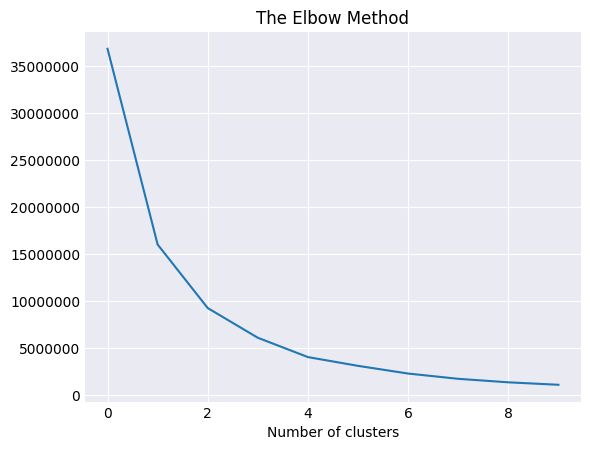

In [5]:
fig, ax = plt.subplots()
x_ticks = np.array(range(len(inertia)))
ax.plot(x_ticks, inertia)
hide_ticks_frame()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%i'))
plt.xlabel('Number of clusters')
plt.title('The Elbow Method')
print('\033[2mdisplaying graph one...\033[0m')
plt.grid(color='white', linestyle='-', zorder=0)
plt.show()

Based on this output, 5 seems to be the optimal amount of clusters.
With more than 5 clusters, the data is not dispersed enough in order to create new cluster.

We can clearly see on the graph that once past 5 cluster, the dispertion is almost null.